# Question 1

Is there a difference in the business stars by major categories (Restaurants, Shopping, Nightlife, ...)? Any differences in Restaurant categories? What is the best restaurant in X?

In [ ]:
import pandas as pd
import ProcessData as p
%matplotlib inline

# Read in data   
business_file = 'yelp_dataset/yelp_academic_dataset_business.json'
business_df = pd.read_json(business_file, lines=True)

## Major Categories

In [1]:
categories = ['Restaurants', 'Shopping', 'Nightlife', 'Active Life', 'Beauty & Spas', 'Automotive', 'Home Services']
business_df = p.process_business(business_df, categories)

In [2]:
business_df.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name',
       ...
       'Smoking', 'WheelchairAccessible', 'WiFi', 'Restaurants', 'Shopping',
       'Nightlife', 'Active Life', 'Beauty & Spas', 'Automotive',
       'Home Services'],
      dtype='object', length=103)

In [3]:
business_df['main_cats'] = business_df[categories].idxmax(1)

In [7]:
print("Overall mean: ", business_df.stars.mean())
print(business_df.stars.groupby(business_df.main_cats).mean().sort_values(ascending=False))

Overall mean:  3.6315504817251965
main_cats
Active Life      4.095717
Beauty & Spas    3.963374
Shopping         3.640637
Home Services    3.613472
Automotive       3.599190
Nightlife        3.583530
Restaurants      3.551136
Name: stars, dtype: float64


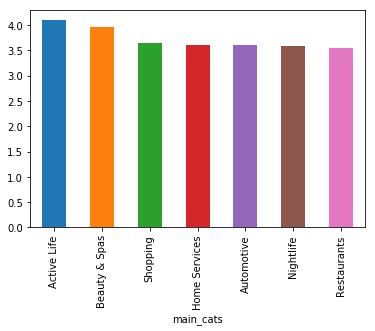

In [5]:
business_df.stars.groupby(business_df.main_cats).mean().sort_values(ascending=False).plot.bar()

## Restaurant Categories

In [ ]:
restaurants_df = business_df[business_df.Restaurants == True]

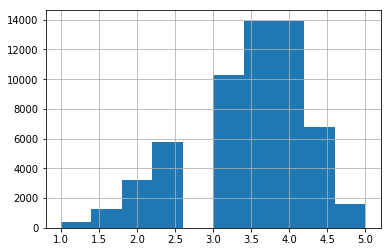

In [89]:
restaurants_df.stars.hist(bins=10)

In [52]:
restaurant_cats = restaurants_df.categories.str.get_dummies(sep=', ')

In [84]:
restaurant_cats.head()

,& Probates,Acai Bowls,Accessories,Accountants,Active Life,Acupuncture,Adult Education,Adult Entertainment,Advertising,Afghan,...,Wine Bars,Wine Tasting Classes,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
restaurants_df[restaurants_df.categories.str.contains('Probate')]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,WheelchairAccessible,WiFi,Restaurants,Shopping,Nightlife,Active Life,Beauty & Spas,Automotive,Home Services,main_cats
177741,"4035 W Chandler Blvd, Ste 4","{'Alcohol': 'none', 'BikeParking': 'False', 'B...",q_B7QQi1FzmT4Axw6ZrnJA,"Food, Bankruptcy Law, Lawyers, Pizza, Tax Serv...",Chandler,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.304735,-111.912146,Law Office of James J Gentile,...,False,False,True,False,False,False,False,False,False,Restaurants


In [82]:
categories = restaurants_df[restaurants_df.categories.str.contains('Probate')].categories
print(categories.iloc[0])

Food, Bankruptcy Law, Lawyers, Pizza, Tax Services, Ice Cream & Frozen Yogurt, Professional Services, Financial Services, Business Consulting, Estate Planning Law, Restaurants, Tax Law, Wills, Trusts, & Probates


Let's look at the top 20 most frequent categories.

In [86]:
restaurant_cats.sum().sort_values(ascending=False)[:25]

Restaurants                  57173
Food                         11667
Nightlife                     7948
Bars                          7646
Sandwiches                    6912
Fast Food                     6812
American (Traditional)        6659
Pizza                         6603
Burgers                       5126
Breakfast & Brunch            5023
Italian                       4550
Mexican                       4419
Chinese                       4247
American (New)                4230
Coffee & Tea                  3108
Cafes                         3056
Japanese                      2566
Chicken Wings                 2538
Seafood                       2369
Salad                         2350
Event Planning & Services     2247
Sushi Bars                    2156
Delis                         1835
Canadian (New)                1828
Asian Fusion                  1780
dtype: int64

We can drop 'Restaurants', 'Food', and 'Nightlife' because they don't tell us anything about the type of restaurant. We'll also drop 'Event Planning & Services' because that doesn't really indicate a restaurant.

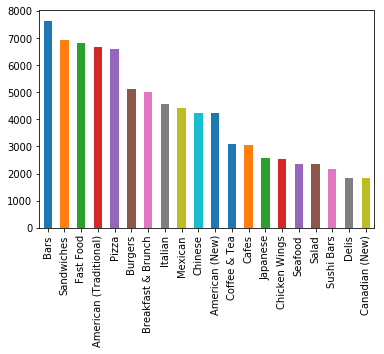

In [47]:
restaurant_cats.drop(['Restaurants', 'Food', 'Nightlife', 'Event Planning & Services'], axis='columns', inplace=True)
restaurant_cats.sum().sort_values(ascending=False)[:20].plot.bar()

In [13]:
restaurants_df[restaurant_cats.Bars == True].stars.mean()

3.4908448862150143

In [39]:
def get_mean_stars(restaurants_df, restaurant_cats, cats):
    means = {}
    for cat in cats:
        means[cat] = restaurants_df[restaurant_cats[cat] == True].stars.mean()
    return pd.Series(means)

Cafes                     3.823789
Delis                     3.612807
Salad                     3.600638
Sushi Bars                3.583952
Breakfast & Brunch        3.579335
Japanese                  3.577747
Seafood                   3.570283
American (New)            3.533806
Coffee & Tea              3.501770
Italian                   3.494725
Bars                      3.490845
Sandwiches                3.465929
Canadian (New)            3.463895
Mexican                   3.436977
Pizza                     3.326670
American (Traditional)    3.318817
Chinese                   3.312809
Burgers                   3.025263
Chicken Wings             2.959417
Fast Food                 2.825822
dtype: float64


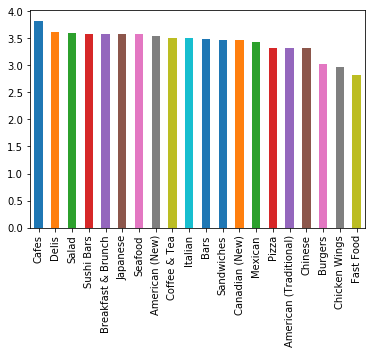

In [48]:
top20 = restaurant_cats.sum().sort_values(ascending=False)[:20]
restaurant_means_df = get_mean_stars(restaurants_df, restaurant_cats, top20.index)

print(restaurant_means_df.sort_values(ascending=False))
restaurant_means_df.sort_values(ascending=False).plot.bar()